<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/TitanicBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Titanic dataset from seaborn
import seaborn as sns
df = sns.load_dataset("titanic")

# Drop rows with missing target
df = df.dropna(subset=['survived'])
print(df)
# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# Handle missing values simply
X['age'].fillna(X['age'].median(), inplace=True)
X['embarked'].fillna('S', inplace=True)  # most common

# Identify categorical columns
cat_features = ['pclass', 'sex', 'embarked']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

/tmp/ipython-input-60-380997236.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
/tmp/ipython-input-60-380997236.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)
/tmp/ipython-input-60-380997236.py:19: FutureWarning: A value is trying to be

In [61]:
!pip install catboost

In [62]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0  # Set to 100 to see logs
)

# Fit with categorical feature support
cat_model.fit(X_train, y_train, cat_features=cat_features)

# Predictions
y_pred = cat_model.predict(X_test)

# Evaluation
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


CatBoost Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



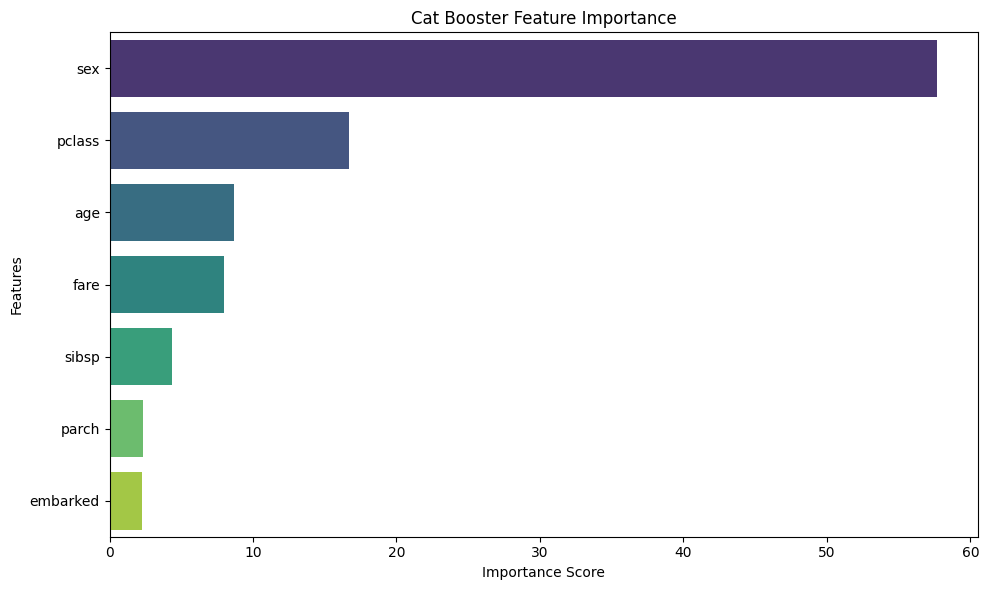

In [63]:
feature_imp = pd.Series(cat_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("Cat Booster Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [64]:
X['sex'] = X['sex'].replace({'male': 0, 'female': 1})
X = pd.get_dummies(X, columns=['embarked'], drop_first=True,dtype=int)
X


/tmp/ipython-input-64-3544085099.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['sex'] = X['sex'].replace({'male': 0, 'female': 1})
/tmp/ipython-input-64-3544085099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].replace({'male': 0, 'female': 1})


,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,0,1
888,3,1,28.0,1,2,23.4500,0,1
889,1,0,26.0,0,0,30.0000,0,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

(array([[-1.61413602, -0.7243102 ,  1.25364106, ..., -0.07868358,
         -0.30335547,  0.59248936],
        [-0.40055118, -0.7243102 , -0.47728355, ..., -0.37714494,
         -0.30335547,  0.59248936],
        [ 0.81303367, -0.7243102 ,  0.21508629, ..., -0.47486697,
         -0.30335547,  0.59248936],
        ...,
        [ 0.81303367, -0.7243102 ,  0.90745614, ..., -0.35580399,
         -0.30335547,  0.59248936],
        [-1.61413602,  1.38062393, -1.1696534 , ...,  1.68320121,
         -0.30335547,  0.59248936],
        [-1.61413602, -0.7243102 , -0.63114352, ...,  0.86074761,
         -0.30335547,  0.59248936]]),
 array([[ 0.81303367, -0.7243102 , -0.09263364, ..., -0.33390078,
         -0.30335547, -1.68779402],
        [-0.40055118, -0.7243102 ,  0.13815631, ..., -0.42528387,
         -0.30335547,  0.59248936],
        [ 0.81303367, -0.7243102 , -0.7080735 , ..., -0.47486697,
         -0.30335547,  0.59248936],
        ...,
        [ 0.81303367,  1.38062393,  0.67666619, ..., -

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, min_samples_leaf=3, min_samples_split=2)


In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ada_model = AdaBoostClassifier(
    estimator=rf_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[84 21]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Accuracy Score: 0.776536312849162


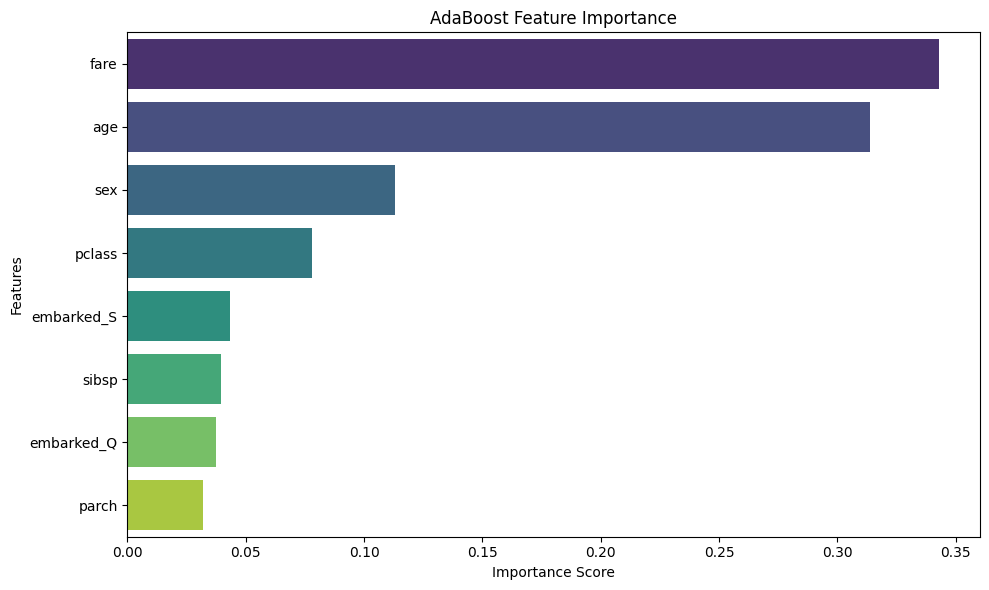

In [69]:
feature_imp = pd.Series(ada_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("AdaBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [70]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    reg_lambda=1,
    subsample=1,
    colsample_bytree=1,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[91 14]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Accuracy Score: 0.8212290502793296


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:04:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


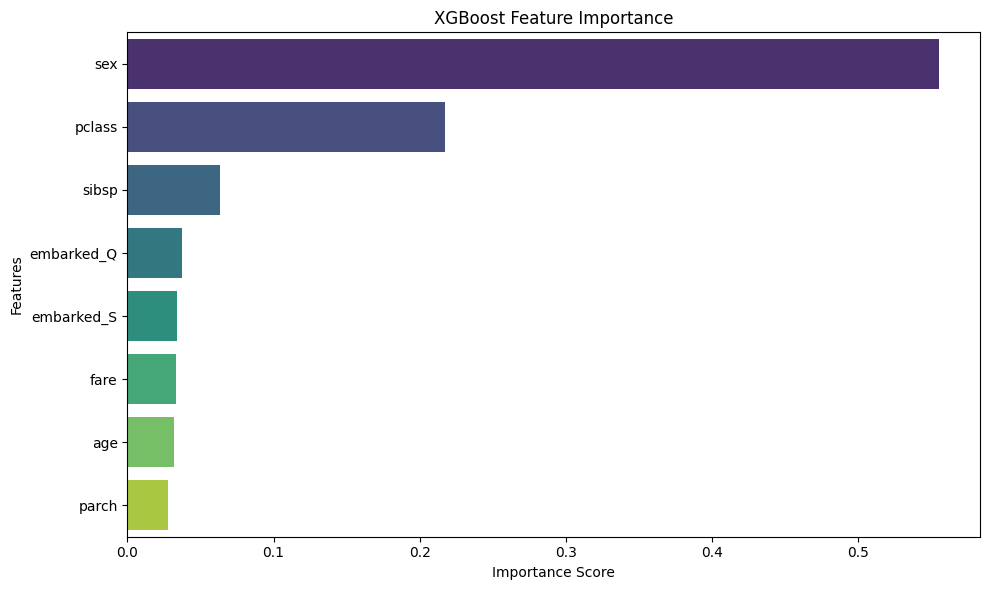

In [71]:
feature_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [72]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_lambda=0.0,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


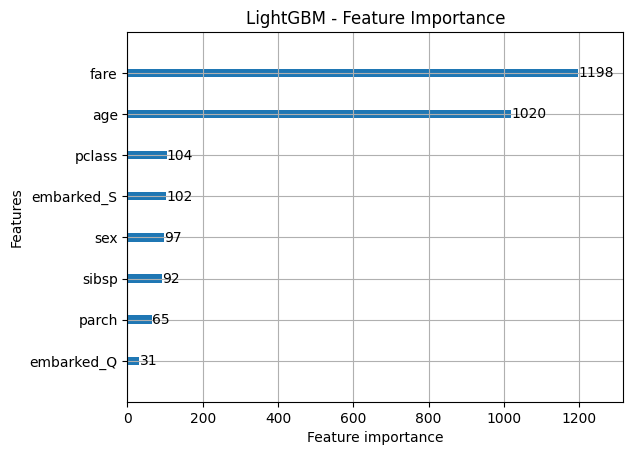

In [74]:
lgb.plot_importance(lgbm_model, max_num_features=10)
plt.title("LightGBM - Feature Importance")
plt.show()